To save features in csv

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import zipfile
with zipfile.ZipFile("/content/drive/MyDrive/DATASET-Aesthetix/image_classification/dataset.zip", 'r') as zip_ref:
  zip_ref.extractall("")

In [33]:
import os
import cv2
import numpy as np
import pandas as pd


def extract_features(img):
    return  list(cv2.mean(im))[:3]


data=[]
basepath='./dataset/'
for folder in os.scandir(basepath):
    if folder.is_dir():
        #print(folder.name)
        for file in os.scandir(folder.path):
            im=cv2.imread(file.path)
            im=cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
            features=extract_features(im)
            features.append(folder.name)
            data.append(features)
            #print(features)

In [34]:
print(data)

[[201.32772732648246, 178.4047279675839, 150.46524047528646, 'melon'], [216.19443616492796, 224.07205166418282, 198.71262791852956, 'melon'], [191.58952649111674, 189.28896335659897, 163.06587087563452, 'melon'], [183.6846496634114, 166.2378011651549, 158.60121150827513, 'melon'], [196.76813440860215, 141.60847849462365, 129.94942204301074, 'melon'], [197.1388400636981, 180.72692446367407, 164.11924238327023, 'melon'], [196.4696317204301, 141.29879569892472, 129.61652688172043, 'melon'], [199.0914880952381, 173.71873015873015, 156.2122222222222, 'melon'], [165.78528442906574, 171.09423944636677, 143.60087474048441, 'melon'], [217.58591259232858, 207.05540703776313, 196.4403057486287, 'melon'], [189.83143399810066, 166.85586815447925, 138.57514245014244, 'melon'], [183.69758646481884, 166.24619744424427, 158.61590341645334, 'melon'], [201.572204828801, 178.40579232047602, 150.47182576978855, 'melon'], [165.81769965397925, 171.0566920415225, 143.59790726643598, 'melon'], [197.15950814253

In [35]:
df = pd.DataFrame(data, columns=['R','G','B','class'])
df.to_csv('curdata.csv',index=False)

In [36]:
df = pd.read_csv('curdata.csv')
print(df)

             R           G           B  class
0   201.327727  178.404728  150.465240  melon
1   216.194436  224.072052  198.712628  melon
2   191.589526  189.288963  163.065871  melon
3   183.684650  166.237801  158.601212  melon
4   196.768134  141.608478  129.949422  melon
5   197.138840  180.726924  164.119242  melon
6   196.469632  141.298796  129.616527  melon
7   199.091488  173.718730  156.212222  melon
8   165.785284  171.094239  143.600875  melon
9   217.585913  207.055407  196.440306  melon
10  189.831434  166.855868  138.575142  melon
11  183.697586  166.246197  158.615903  melon
12  201.572205  178.405792  150.471826  melon
13  165.817700  171.056692  143.597907  melon
14  197.159508  180.733692  164.102694  melon
15  148.114370  129.731200   84.095921  melon
16  168.287899  166.921480  147.618644  melon
17  167.804247  185.986963  154.679269  melon
18  148.114370  129.731200   84.095921  melon
19  166.031210  170.961719  143.619990  melon
20  243.801982  229.538529  197.48

In [37]:
pip install pycaret

In [38]:
import pycaret
pycaret.__version__

'3.3.0'

In [39]:
# import pycaret classification and init setup
from pycaret.classification import *
import pandas as pd

# Load CSV file
#data = pd.read_csv('/content/drive/MyDrive/DATASET-Aesthetix/curdata.csv')

s = setup(df, target = 'class', session_id = 1)

,Description,Value
0,Session id,1
1,Target,class
2,Target type,Binary
3,Target mapping,"lemon: 0, melon: 1"
4,Original data shape,"(42, 4)"
5,Transformed data shape,"(42, 4)"
6,Transformed train set shape,"(29, 4)"
7,Transformed test set shape,"(13, 4)"
8,Numeric features,3
9,Preprocess,True


In [40]:
# Compare models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.5610
knn,K Neighbors Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1490
nb,Naive Bayes,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.1280
dt,Decision Tree Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0610
ridge,Ridge Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0830
rf,Random Forest Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.3750
qda,Quadratic Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0740
ada,Ada Boost Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0570
gbc,Gradient Boosting Classifier,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.2910
lda,Linear Discriminant Analysis,1.0000,0.0000,1.0000,1.0000,1.0000,1.0000,1.0000,0.0680


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

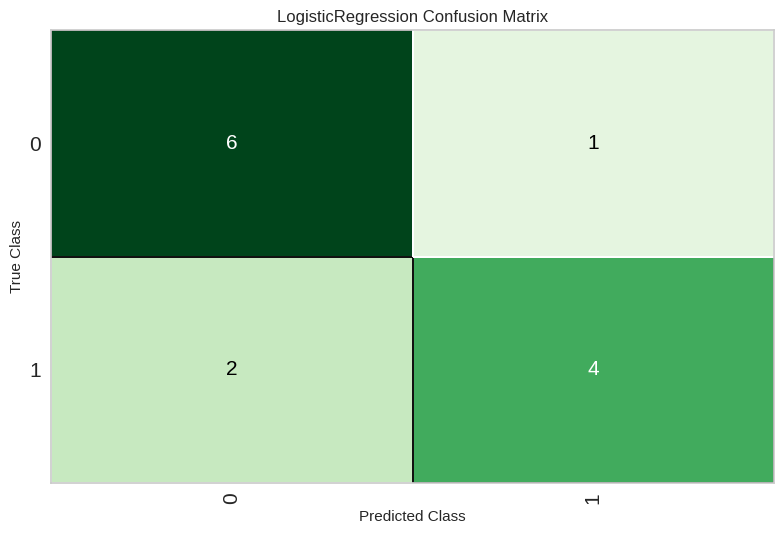

In [41]:
# plot confusion matrix of the best model
plot_model(best_model, plot = 'confusion_matrix')

In [42]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [43]:
# Save the best model
save_model(best_model, 'rf_model')
print("Best model saved successfully.")

Transformation Pipeline and Model Successfully Saved
Best model saved successfully.


In [44]:
# Load the saved model
saved_model = load_model('rf_model')

Transformation Pipeline and Model Successfully Loaded


In [45]:
# # Read the image from the laptop
# file_path = '/content/drive/MyDrive/DATASET-Aesthetix/image_classification/FSML/lemon/1439-2.jpg'  # Replace this with the path to your image file
# im = cv2.imread(file_path)

In [46]:
import cv2
import pandas as pd
import numpy as np
from google.colab import files

# Function to extract features from the image
def extract_features(image):
    # calculates the mean separately for each color channel (R, G, B) across all rows and columns.
    # resulting output is a 1-dimensional array containing the mean values of each color channel across the entire image.
    return image.mean(axis=(0, 1))

# Upload multiple images
uploaded_files = files.upload()

# Initialize an empty list to store extracted features for all images
all_features = []

# Iterate over each uploaded image
for file_name, file_data in uploaded_files.items():
    # Read the image from the uploaded file content

    #converts the binary image data into a format that can be interpreted and manipulated using NumPy.
    nparr = np.frombuffer(file_data, np.uint8)

    # decodes it into an image format that OpenCV can work with
    im = cv2.imdecode(nparr, cv2.IMREAD_COLOR)

    # Convert the image to RGB format
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

    # Extract features from the image
    features = extract_features(im)

    # Append features to the list
    all_features.append(features)

# Create a DataFrame with R, G, and B values for all images
new_data = pd.DataFrame(all_features, columns=['R', 'G', 'B'])

print("New data with R, G, B values for all images:")
print(new_data)


Saving 2.jpg to 2 (1).jpg
Saving 2_1212685_e.jpg to 2_1212685_e.jpg
Saving 3.jpg to 3.jpg
Saving 4.jpg to 4.jpg
Saving 5.jpg to 5.jpg
New data with R, G, B values for all images:
            R           G           B
0  199.091488  173.718730  156.212222
1  197.159508  180.733692  164.102694
2  191.589526  189.288963  163.065871
3  167.804247  185.986963  154.679269
4  189.831434  166.855868  138.575142


In [48]:
# # Create a DataFrame with new data
# new_data = pd.DataFrame({
#     'R': [148.11437037037038],
#     'G': [129.7312],
#     'B': [84.09592098765432]
# })

# Load the saved model
saved_model = load_model('rf_model')  # Assuming 'rf_model' is the name of the saved model

# Use the loaded model for predictions
predictions = predict_model(saved_model, data=new_data)

print(predictions)


Transformation Pipeline and Model Successfully Loaded


            R           G           B prediction_label  prediction_score
0  199.091492  173.718735  156.212219            melon            0.9997
1  197.159515  180.733688  164.102692            melon            0.9991
2  191.589523  189.288971  163.065872            melon            0.9986
3  167.804245  185.986969  154.679276            melon            1.0000
4  189.831436  166.855865  138.575150            melon            1.0000
